In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  3 15:24:42 2022

@author: Lin
"""

from os import times
import numpy as np
import math
from tqdm import tqdm

def get_energy_timestep(logfile_path):
    # Energy
    delta = 0
    step = 0
    start_point = 0
    with open(logfile_path + ".logfile") as f:
        for i, line in enumerate(f):
            if len(line.split()) > 1:
                try:
                    if (line.split())[0] == "stats": delta = float(line.split()[1])
                    if (line.split())[0] == "run": step = float(line.split()[1])
                except ValueError:
                    continue
            if line == '      Time    Naccept    Nreject    Nsweeps        CPU     Energy\n':
                start_point = i + 1

    timestep = np.zeros(int(step / delta) + 1)
    energy = np.zeros(int(step / delta) + 1)
    end_point = start_point + int(step / delta) + 1
    with open(logfile_path + ".logfile") as f:
        for i, line in enumerate(f):
            if i >= start_point and i < end_point:
                timestep[i - start_point] = int(line.split()[0])
                energy[i-start_point] = float(line.split()[5])

    return timestep, energy

logfile_folder_iso = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_multiCoreCompare/"
logfile_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/"
sigma_type_070 = "0.7"
sigma_type_080 = "0.8"
sigma_type_090 = "0.9"

energy_function = "Cosmin1"
npy_file_name_iso = "p_ori_ave_aveE_20000_multiCore32_delta0.0_m2_J1_refer_1_0_0_seed56689_kt066"
npy_file_name_aniso_070 = f"p_aveE_20000_{energy_function}_delta{sigma_type_070}_J1_refer_1_0_0_seed56689_kt0.66"
npy_file_name_aniso_080 = f"p_aveE_20000_{energy_function}_delta{sigma_type_080}_J1_refer_1_0_0_seed56689_kt0.66"
npy_file_name_aniso_090 = f"p_aveE_20000_{energy_function}_delta{sigma_type_090}_J1_refer_1_0_0_seed56689_kt0.66"

logfile_path = [logfile_folder_iso+npy_file_name_iso,
                logfile_folder+npy_file_name_aniso_070,
                logfile_folder+npy_file_name_aniso_080,
                logfile_folder+npy_file_name_aniso_090]

timestep = []
energy = []
for i in range(len(logfile_path)):
    timestep_one, energy_one = get_energy_timestep(logfile_path[i])
    timestep.append(timestep_one)
    energy.append(energy_one)
timestep = np.array(timestep, dtype=float)
energy = np.array(energy, dtype=float)

# Get grain num with npy file name
npy_file_folder_iso = logfile_folder_iso + "results/"
npy_file_folder = logfile_folder + "results/"

# Initial data
npy_file_iso = np.load(npy_file_folder_iso + npy_file_name_iso + ".npy")
npy_file_aniso_070 = np.load(npy_file_folder + npy_file_name_aniso_070 + ".npy")
npy_file_aniso_080 = np.load(npy_file_folder + npy_file_name_aniso_080 + ".npy")
npy_file_aniso_090 = np.load(npy_file_folder + npy_file_name_aniso_090 + ".npy")
print(f"The 0.70 data size is: {npy_file_aniso_070.shape}")
print(f"The 0.80 data size is: {npy_file_aniso_080.shape}")
print(f"The 0.90 data size is: {npy_file_aniso_090.shape}")
print(f"The iso data size is: {npy_file_iso.shape}")
print("READING DATA DONE")

# Initial container
initial_grain_num = 20000
step_num = npy_file_aniso_090.shape[0]
grain_num_aniso_070 = np.zeros(step_num)
grain_num_aniso_080 = np.zeros(step_num)
grain_num_aniso_090 = np.zeros(step_num)
grain_num_iso = np.zeros(step_num)

# Calculate the number of grains
for i in range(step_num):
    grain_num_aniso_070[i] = len(set(npy_file_aniso_070[i,:].flatten()))
    grain_num_aniso_080[i] = len(set(npy_file_aniso_080[i,:].flatten()))
    grain_num_aniso_090[i] = len(set(npy_file_aniso_090[i,:].flatten()))
    grain_num_iso[i] = len(set(npy_file_iso[i,:].flatten()))

grain_num_list = [grain_num_iso, grain_num_aniso_070, grain_num_aniso_080, grain_num_aniso_090]
print("NUMBER CALCULATION DONE")


The 0.70 data size is: (601, 2400, 2400, 1)
The 0.80 data size is: (601, 2400, 2400, 1)
The 0.90 data size is: (601, 2400, 2400, 1)
The iso data size is: (601, 2400, 2400, 1)
READING DATA DONE


## Plot

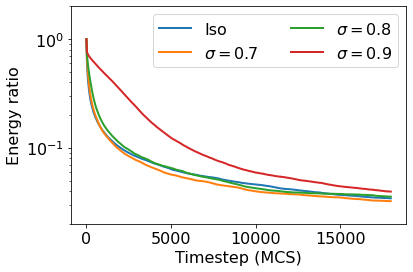

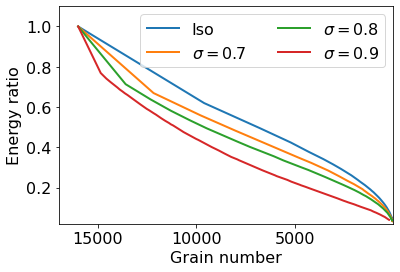

In [18]:
#Plot
import matplotlib.pyplot as plt
plt.figure()
label = [ 'Iso', r'$\sigma=0.7$', r'$\sigma=0.8$', r'$\sigma=0.9$']
for i in range(len(energy)):
    energy[i] = energy[i]/energy[i][0]
    plt.plot(timestep[i], energy[i],'-',linewidth=2,label=label[i])
plt.xlabel("Timestep (MCS)",fontsize=16)
plt.ylabel("Energy ratio",fontsize=16)
plt.legend(fontsize=16, ncol=2)
plt.yscale("log")
plt.ylim([0.02,2])
plt.xticks([0,5000,10000,15000],fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("energy_figures/Energy_VS_Timestep_pz_diff_sigma_kT066_sameInitialEnergy",dpi=400,bbox_inches='tight')

fig, ax = plt.subplots()
label = [ 'Iso', r'$\sigma=0.7$', r'$\sigma=0.8$', r'$\sigma=0.9$']
for i in range(len(energy)):
    energy[i] = energy[i]/energy[i][0]
    plt.plot(grain_num_list[i], energy[i],'-',linewidth=2,label=label[i])
plt.xlabel("Grain number",fontsize=16)
plt.ylabel("Energy ratio",fontsize=16)
plt.legend(fontsize=16, ncol=2)
# plt.yscale("log")
# plt.xscale("log")
plt.xlim([0,17000])
plt.ylim([0.02,1.1])
plt.xticks([15000,10000,5000],fontsize=16)
plt.yticks(fontsize=16)
ax.invert_xaxis()
plt.savefig("energy_figures/Energy_VS_Grainnum_pz_diff_sigma_kT066_sameInitialEnergy",dpi=400,bbox_inches='tight')